In [80]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [81]:
df=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv')


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [83]:
df.isna().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [84]:
df.category.unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [85]:
df.old_price.unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

In [86]:
df.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [87]:
df['old_price']=df['old_price'].str.replace('No old price', '0')
df['old_price']=df['old_price'].str.replace('SR ', '')
df['old_price']=df['old_price'].str.replace(',', '')
#чистим колонку старая цена для того чтоб данные можно было переобразовать в числовые значения

In [88]:
df['old_price'] = df['old_price'].fillna(0)
#количество пустот в старой цене 10, заполним их нулями

In [89]:
df['old_price']=pd.to_numeric(df['old_price'], errors='coerce')
#переобразовываем колонку старая цена в числовой тип данных

In [90]:
df[['width', 'height', 'depth']] = df.groupby(['category'])['width', 'height', 'depth'].transform(lambda x: x.fillna(x.mean()))

C:\Users\User\AppData\Local\Temp\ipykernel_4832\1058220307.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[['width', 'height', 'depth']] = df.groupby(['category'])['width', 'height', 'depth'].transform(lambda x: x.fillna(x.mean()))


In [91]:
df.head(3)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,0.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,46.925926,99.000000,51.000000
1,1,368814,NORDVIKEN,Bar furniture,995.0,0.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,46.925926,105.000000,80.000000
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,0.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,46.925926,97.571429,52.945946


In [92]:
df.tail(3)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3691,3691,59157541,ELVARLI,Wardrobes,924.0,1050.0,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,216.537736,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,3130.0,True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,216.537736,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,1535.0,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,216.537736,175.0


In [93]:
df.groupby('category').mean()[['price','depth','height','width']].sort_values(by='price')

,price,depth,height,width
category,,,,
Children's furniture,272.758065,44.521277,75.857143,63.000000
Nursery furniture,393.659794,43.090909,84.821429,64.709677
Bookcases & shelving units,519.416058,36.922737,131.097285,106.563008
Café furniture,553.884615,44.785714,80.954545,54.333333
Chests of drawers & drawer units,612.180000,47.157025,78.487805,76.664000
TV & media furniture,659.050526,37.150376,99.664062,132.285714
Trolleys,678.517857,49.777778,86.592593,58.500000
Bar furniture,679.553191,46.925926,97.571429,52.945946
Cabinets & cupboards,789.015753,37.493671,113.408696,98.750000


In [94]:
df_1=df.groupby(['category','sellable_online']).mean()[['price','old_price']]
df_1.sort_values('price')

price   old_price
category                             sellable_online                         
Sofas & armchairs                    False              39.000000    0.000000
Trolleys                             False              39.000000    0.000000
Bookcases & shelving units           False              50.000000    0.000000
Cabinets & cupboards                 False              50.000000    0.000000
TV & media furniture                 False              50.000000    0.000000
Nursery furniture                    False              58.750000    0.000000
Children's furniture                 False              97.000000    0.000000
                                     True              280.142857   11.050420
Beds                                 False             378.333333    0.000000
Nursery furniture                    True              408.064516   10.913978
Bookcases & shelving units           True              520.274223   99.119048
Café furniture                       True              553.884615   60.192308
Chests of drawers & drawer units     True              612.180000  424.152000
Bar furniture                        True              649.409091  258.295455
TV & media furniture                 True              662.273016  120.380952
Trolleys                             True              702.203704   51.481481
Chairs                               False             711.000000  346.250000
Cabinets & cupboards                 True              791.555326   84.838488
Outdoor furniture                    True              859.826852  216.483721
Room dividers                        True              932.000000  664.615385
Tables & desks                       False            1046.000000  346.250000
Chairs                               True             1051.766457  172.264151
Sideboards, buffets & console tables True             1068.086957   43.260870
Bar furniture                        False            1121.666667    0.000000
Tables & desks                       True             1129.944079  231.039474
Beds                                 True             1666.004878  701.300000
Sofas & armchairs                    True             2008.618267  703.643868
Wardrobes                            True             2162.141949  720.211864

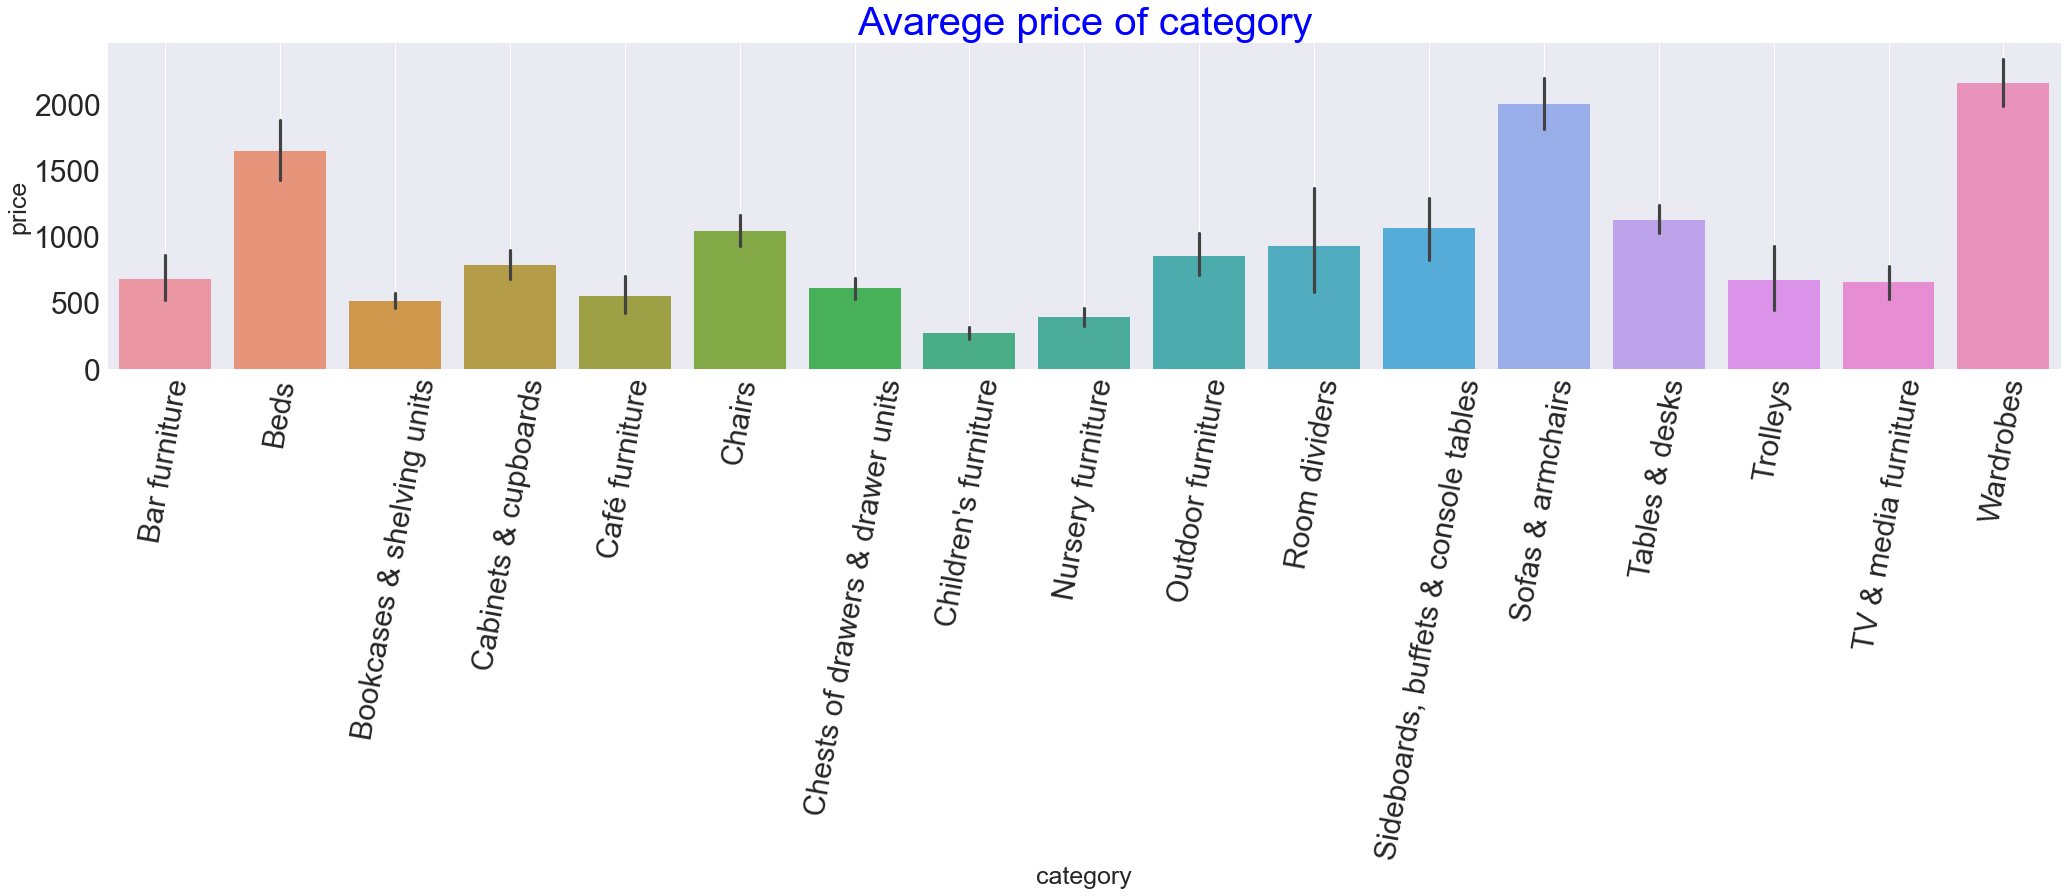

In [95]:
plt.figure(figsize=(35,6))
palette='rainbow'
plt.style.use('seaborn')
sns.barplot(x='category',y='price', data=df)
plt.xticks(rotation=80)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.title('Avarege price of category',fontsize=40, c= 'b')
plt.xlabel('category',fontsize=25)
plt.ylabel('price',fontsize=25)
plt.grid()
plt.show()

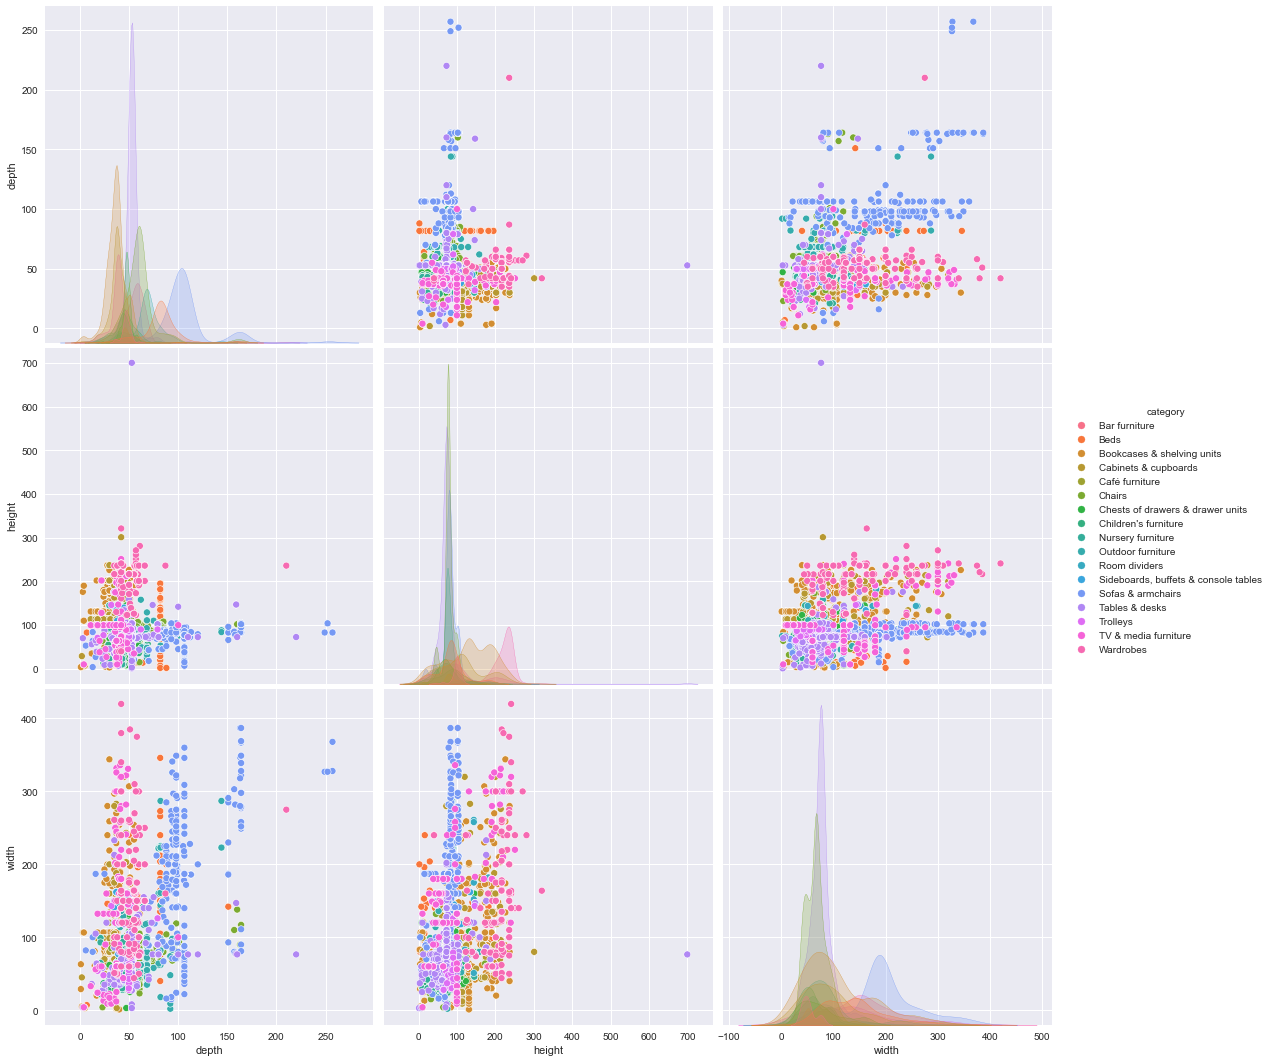

In [96]:
sns.pairplot(df[['category','depth','height','width']], hue='category',height=5)

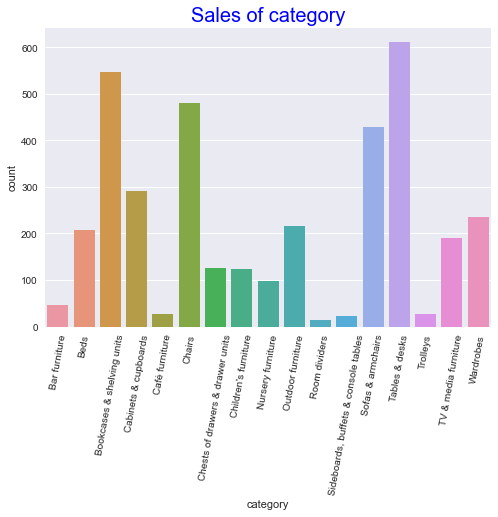

In [97]:
sns.countplot(data=df,x='category')
plt.xticks(rotation=80)
plt.title('Sales of category',fontsize=20, c= 'b')
plt.show()

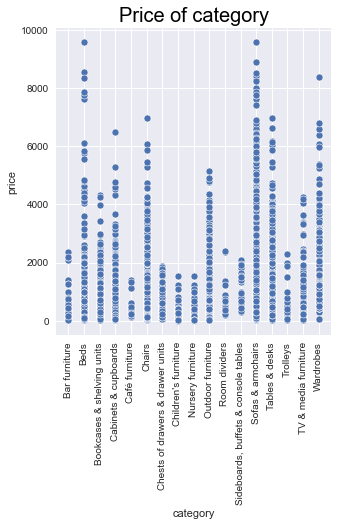

In [98]:
plt.style.use('seaborn')
sns.relplot(x='category',y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price of category',fontsize=20, c= 'black')
plt.show()

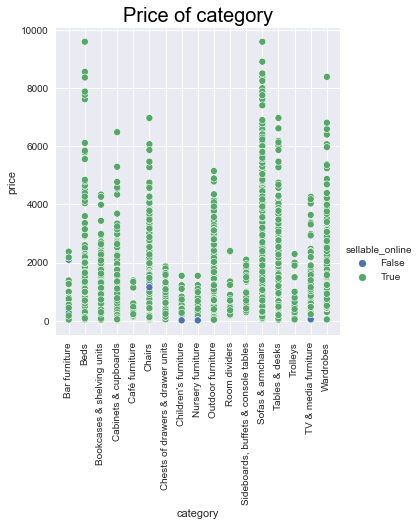

In [105]:
plt.style.use('seaborn')
sns.relplot(x='category',y='price', hue='sellable_online', data=df)
plt.xticks(rotation=90)
plt.title('Price of category',fontsize=20, c= 'black')
plt.show()

In [99]:
sample = (df['price'] - np.mean(df['price'])) / np.std(df['price']) 
# нормализация, центрировать вокруг нуля

p-value 0.0
0.7312208414077759


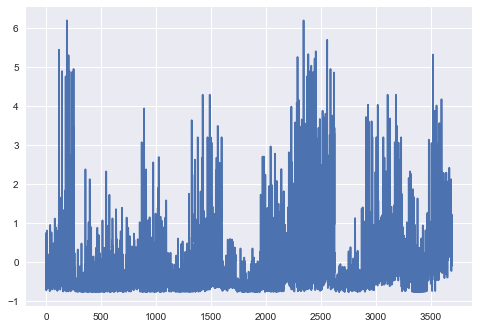

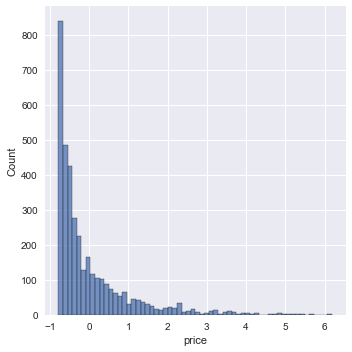

In [100]:
stat, p = sps.shapiro(sample)
print(f'p-value {p}')
plt.plot(sample)
print(stat)
sns.displot(sample);
plt.show()

In [120]:
x=df[['depth','height','width']]
y=df['category']

print(x.shape)
print(y.shape)

(3694, 3)
(3694,)


In [145]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2216, 3)
(2216,)
(1478, 3)
(1478,)


In [146]:
k_range = list(range(20,50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y, y_pred))


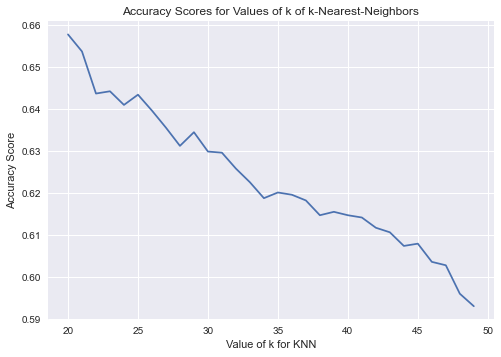

In [147]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [149]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(x_train, y_train)
knn.predict([[44, 80, 63]])


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Nursery furniture'], dtype=object)

In [150]:
knn.score(x_train, y_train)

0.6277075812274369

### Набор данных представляет собой прайс лист мебели по категориям:
* мебель для бара
* кровати
* книжные шкафы и стелажи
* шкафы и тумбы
* мебельдля кафе
* стулья
* комоды и ящики
* мебель для детей
* мебель для младенцев
* уличная мебель
* комнатные перегородки
* серванты
* буфеты и консольные столики
* диваны и кресла
* столы и парты
* тележки
* ТВ и медиа мебель
* гардеробные
  
  
  В набаоре данных информация по старой и новой цене, виду мебели,  описанию и характеристике мебели, а также информация о  возможности купить товар онлайн. При анализе данных видно что старая цена указана лишь на тот товар который можно купить онлайн на товар который можно купить лишь в магазине в колонке старая цена значения 0, также по колонке старая цена было 10 значений Nan которые я заполнила нулями по скольку товар может быть новым и старая цена в принципе не существовала.В принципе колонка старая цена не оченьинформативна так как в большинстве случаев старая цена отсутсувует и анализ по этой колонке провести невозможно. а также в колнках глубина, высота, вес.  Не думаю что цена товара как то зависит от дизайнера или найменования потому как по этим колонкам слишком много уникальных значений и там тяжело выстроить связь с ценой.
  Припускаю что цена зависит от групы товара что впринципе подтверждается графиками и также групировкой датафрейма(видим что самые дорогие товары в категориях кровати, кресла и диваны и гардеробные). Также каждая категория товара имееют примерно одинаковую высоту, ширину, глубину что видно выше по графикам pairplot.
  По некоторым позициям колонках высота, ширина, глубина были значения Nan их заполнили средними значениями по тем категориям к которым пренадлежала позиция.
  При создании модели которая будет предсказывть цену используем колонки категория мебели , высота, ширина, глубина, так как от колонок высота, ширина, глубина зависит категория мебели, а от категории мебели зависит цена. Модель обучения нам покажет категорию, а потом в групированой таблице по категории мы посмотрим цену